
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

Some of the important variables for nestquant:

- *TECHNOLOGY*: 65 nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



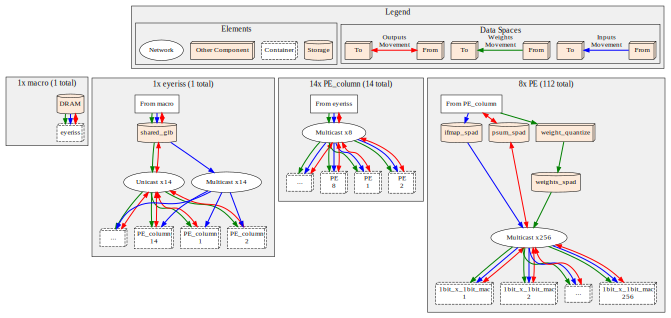

In [2]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

{get_important_variables_markdown('nestquant')}

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml


100%|██████████| 2/2 [01:00<00:00, 30.43s/it]


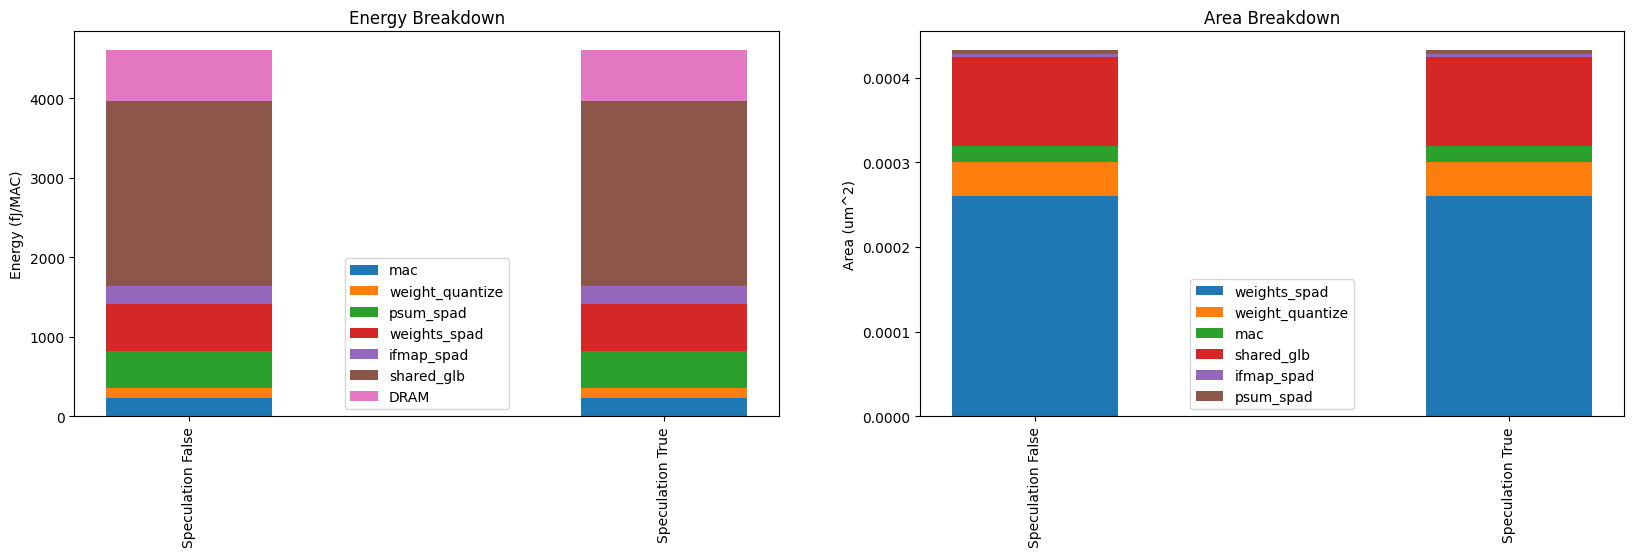

In [33]:
result = run_test("nestquant", "test_area_energy_breakdown")
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)

In [37]:
result = run_test("nestquant", "test_area_energy_breakdown")

Running on layer /home/workspace/models/workloads/llm/gemm.yaml


In [36]:
result.per_component_energy

{'mac': 0.001974722883485696,
 'weight_quantize': 0.001099511627776,
 'psum_spad': 0.0039802320925491205,
 'weights_spad': 0.00510173395288064,
 'ifmap_spad': 0.001965926790463488,
 'shared_glb': 0.019967131160412162,
 'DRAM': 0.00549755813888}

In [43]:
result.per_component_energy

{'mac': 0.001974722883485696,
 'psum_spad': 0.0039802320925491205,
 'weights_spad': 0.01020346790576128,
 'ifmap_spad': 0.001965926790463488,
 'weight_quantize': 0.00013765885579755522,
 'shared_glb': 0.019967131160412162,
 'DRAM': 0.00549755813888}

In [45]:
result.per_component_energy

{'mac': 0.001974722883485696,
 'psum_spad': 0.0039802320925491205,
 'weights_spad': 0.01020346790576128,
 'ifmap_spad': 0.001965926790463488,
 'weight_quantize': 0.00013765885579755522,
 'shared_glb': 0.019967131160412162,
 'DRAM': 0.00549755813888}

In [46]:
result.per_component_area

{'weight_quantize': 4.2266e-08,
 'weights_spad': 2.24e-06,
 'mac': 1.6800014336e-07,
 'shared_glb': 8.9678e-07,
 'ifmap_spad': 3.3981248e-08,
 'psum_spad': 4.1683264e-08}

In [32]:
result[0].per_component_energy

{'mac': 0.001974722883485696,
 'weight_quantize': 0.001099511627776,
 'psum_spad': 0.0039802320925491205,
 'weights_spad': 0.00510173395288064,
 'ifmap_spad': 0.001965926790463488,
 'shared_glb': 0.019967131160412162,
 'DRAM': 0.00549755813888}

In [44]:
result = run_test("nestquant", "test_area_energy_breakdown", True, "w2", "workloads/llm/gemm.yaml")

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w2.yaml


In [24]:
result[0].per_component_energy["weight_quantize"] / sum(result[0].per_component_energy.values())

0.017484351505402666

In [34]:
result[0].per_component_area["weight_quantize"] / sum(result[0].per_component_area.values())

0.09092951283676488